<a href="https://colab.research.google.com/github/laerteluizf/Proc_Imagens_2025_2/blob/main/Proc_Imagens_3_Tarefa_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from google.colab.patches import cv2_imshow

In [23]:
def aplicar_filtro_media_suavizar(imagem_original, tamanho_kernel):

    # Verifica a imagem e se o kernel é ímpar
    if imagem_original is None:
        print("Erro: Não foi possível carregar a imagem. Verifique o caminho.")
        return
    if tamanho_kernel % 2 == 0:
        print("Erro: O do kernel deve ser um número ímpar (ex: 3, 5, 7).")
        return

    imagem_equalizada = cv2.equalizeHist(imagem_original)

    # Obter as dimensões da imagem
    altura, largura = imagem_original.shape

    # Criar uma nova matriz para a imagem de saída
    # Usamos np.zeros_like para garantir que a matriz tenha as mesmas dimensões e tipo de dado
    imagem_suavizada = np.zeros_like(imagem_original)

    # Definir o "raio" do kernel
    raio = tamanho_kernel // 2

    # Iterar sobre cada pixel da imagem menos as bordas(raios)
    for i in range(raio, altura - raio):
        for j in range(raio, largura - raio):
            # Calculo "janela" de interesse (kernel)
            vizinhos = imagem_original[i - raio : i + raio + 1, j - raio : j + raio + 1]

            # Calcular a média dos valores na janela
            media_vizinhos = np.mean(vizinhos)

            # Atribuir o valor da média ao pixel na nova imagem
            imagem_suavizada[i, j] = media_vizinhos

    #equalização da imagem suavizada
    imagem_equalizada = cv2.equalizeHist(imagem_suavizada)

    #  Exibir as imagens para comparação
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(imagem_suavizada, cmap='gray')
    axs[0].set_title(f'Imagem Suavizada (Kernel {tamanho_kernel}x{tamanho_kernel})')
    axs[0].axis('off')

    axs[1].imshow(imagem_equalizada, cmap='gray')
    #axs[1].set_title('Imagem Equalizada')
    axs[1].set_title('Imagem Media Equalizada')
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()


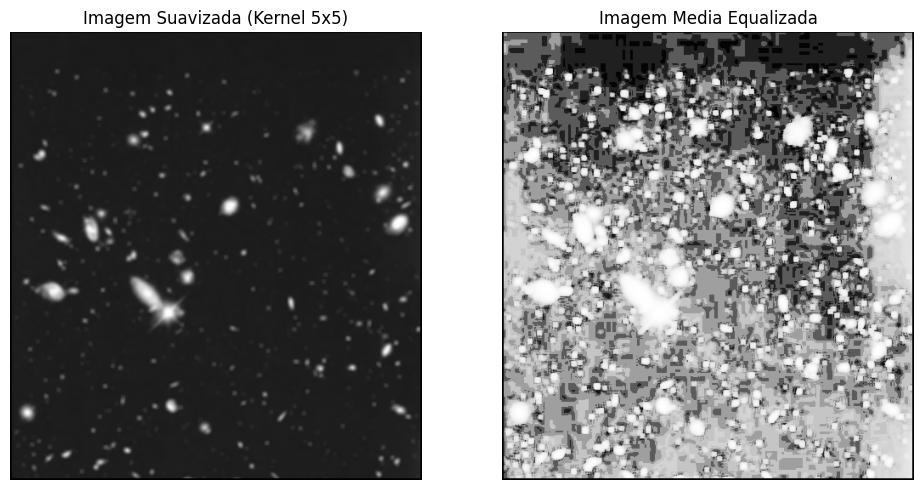

In [24]:
# --- Execução do programa ---

caminho_imgagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Atividade 6/FIG033~2.TIF'

imagem_ori = cv2.imread(caminho_imgagem, 0)

tamanho_kernel = 5

aplicar_filtro_media_suavizar(imagem_ori, tamanho_kernel)